# 2개의 층

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
  keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


- 픽셀값을 0 ~ 255 범위에서 0~1 사이로 변환하고 $ 28 \times 28 $ 크기의 2차원 배열을 784 크기의 1차원 배열로 펼침

In [2]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

- 이제 인공 신경망 모델에 층을 2개 추가해 보겠음

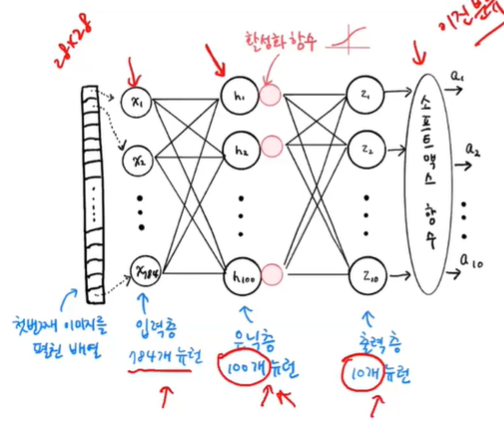

- 입력층과 출력층 사이에 **은닉층**이 생김
- 이진분류 : 시그모이드 함수
- 다중분류 : softmax 함수

- 비선형적으로 틀어줘야 신경망 수행이 가능해짐

- 시그모이드 함수 
$ϕ = \frac{1}{1+e^{-z}}$

In [3]:
dense1 = keras.layers.Dense(100, activation='sigmoid',input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

- dense1은 은닉층, 100개의 뉴런을 가진 밀집층임
- 활성화 함수를 sigmoid로 지정
- dense2는 출력층, 10개의 클래스를 분류함

# 심층 신경망 만들기

In [6]:
model = keras.Sequential([dense1, dense2])

- 2개 이상의 층을 추가 가능

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- summary로 모델의 정보를 얻을 수 있음

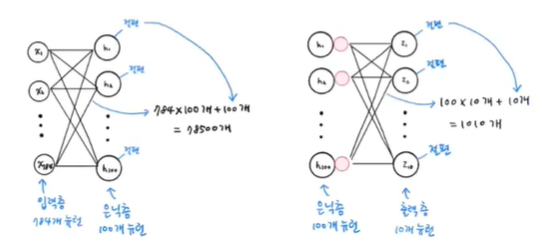

- None은 배치사이즈, keras는 기본 미니배치 크기를 32로 설정함
- 파라미터 개수
  - 입력 픽셀 784개
  - 100개의 가중치
  - 뉴런마다 1개의 절편


- $ 784 \times 100 + 100 = 78,500 $

---
- 두번째 층 크기 (None, 10)
- 파라미터 개수
  - 은닉층 100개의 뉴런
  - 출력층 10개의 뉴런
  - 뉴런마다 1개의 절편

- $100 \times 10 + 10 = 1,010$

---
- 총 모델 파라미터 개수 : 79,510개
- 간혹 훈련되지 않는 파라미터를 가진 층이 있다면 Non-trainable params에 개수가 표현됨

# 층을 추가하는 다른 방법

In [8]:
model = keras.Sequential([
                          keras.layers.Dense(100, activation='sigmoid', input_shape=(784,),
                                             name='hidden'),
                          keras.layers.Dense(10, activation='softmax', name='output')
], name="패션 MNIST 모델")

In [9]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- add() 메서드를 호출하여 층을 추가함

In [11]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- 모델 훈련 진행

In [13]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5617 - accuracy: 0.8086
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4101 - accuracy: 0.8535
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3757 - accuracy: 0.8629
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3521 - accuracy: 0.8724
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3348 - accuracy: 0.8778


- 추가된 층이 성능을 향상시켰다는 것을 볼 수 있음

# 렐루 함수

- gradient를 죽이기 때문에 신속하게 대응이 불가능함

- 이에 ReLU 함수 적용
- $max(0,z)$

- Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 함

In [14]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

- Flatten 클래스는 학습하는 층이 아님

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
(train_input, train_target), (test_input, test_target) = \
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [18]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5390 - accuracy: 0.8111
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3943 - accuracy: 0.8569
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3556 - accuracy: 0.8720
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3334 - accuracy: 0.8814
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3185 - accuracy: 0.8852


In [19]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3593 - accuracy: 0.8782


[0.35934802889823914, 0.878166675567627]

- 향상된 것을 볼 수 있음

# 옵티마이저
- batch_size, epochs, 층 개수 등 하이퍼파라미터임
- 케라스의 기본 경사 하강법 : RMSprop
  - 다양한 경사 하강법 알고리즘을 제공함
    - **옵티마이저**
    - 확률적 경사 하강법 SGD 적용해보겠음

```
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')
```

- 위 코드와 동일함


```
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')
```

- SGD 클래스의 학습률 기본값이 0.01일 때 이를 바꾸고 싶으면 learning_rate 매개변수를 지정하여 사용함

```
sgd = keras.optimizers.SGD(learning_rate=0.1)
```

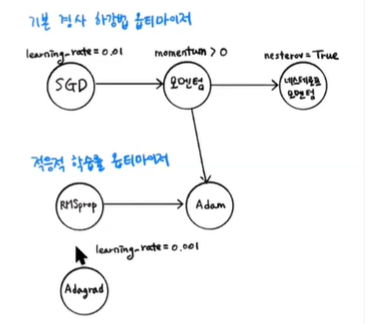

- SGD 외에도 다양한 옵티마이저들이 있음

- 기본 경사 하강법 옵티마이저는 모두 SGD 클래스에서 제공함
- SGD 클래스의 momentum 매개변수의 기본값은 0임
- 이를 0보다 큰 값으로 지정하면 마치 이전의 그레이디언트를 가속도처럼 사용하는 **모멘텀 최적화**를 사용함
- 보통 momentum 매개변수는 0.9이상을 지정함

---
- SGD 클래스의 nesterov 매개변수를 기본값 False에서 True로 바꾸면 네스테로프 모멘텀 최적화를 사용함

```
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
```

- 모멘텀 최적화를 2번 반복하여 구현함
- 네스테로프 모멘텀 최적화가 기본 경사 하강법보다 더 나은 성능을 제공함

- 모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있음
  - 안정적으로 최적점에 수렴할 가능성이 높음
  - 이런 학습률을 **적응적 학습률**이라고 함

---
- 적응적 학습률을 사용하는 대표적인 옵티마이저는 Adagrad와 RMSprop임
- 각각 compile() 메서드의 optimizer 매개변수에 'adagrad'와 'rmsprop'으로 지정할 수 있음
  - 기본값은 rmsprop

```
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')
```


```
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')
```

- 모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam임
- 3개 클래스 learning_rate 기본값이 0.001임

In [20]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5223 - accuracy: 0.8192
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3899 - accuracy: 0.8602
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3508 - accuracy: 0.8726
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3221 - accuracy: 0.8818
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3066 - accuracy: 0.8869


- 기본 RMSprop을 사용했을 때와 거의 같은 성능을 보여줌

In [23]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3510 - accuracy: 0.8767


[0.3509669899940491, 0.8766666650772095]